## **Group Project**


##### **Title** : Yummy Or Dummy?
Angela Li, Phoebe Wu, Sarah Feng

##### **Methods and Results**

In [138]:
# Import required packages
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC

In [3]:
# Read mushroom dataset from kaggle via URL
mushrooms_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data')

# rename columns for readability and ease of use
col_names = {
    "p": "class",
    "x": "cap_shape",
    "s": "cap_surface",
    "n": "cap_colour",
    "t": "bruises",
    "p.1": "odour",
    "f": "gill_attachment",
    "c": "gill_spacing",
    "n.1": "gill_size",
    "k": "gill_colour",
    "e": "stalk_shape",
    "e.1": "stalk_root",
    "s.1": "stalk_surface_above_ring",
    "s.2": "stalk_surface_below_ring",
    "w": "stalk_colour_above_ring",
    "w.1": "stalk_colour_below_ring",
    "p.2": "veil_type",
    "w.2": "veil_colour",
    "o": "ring_number",
    "p.3": "ring_type",
    "k.1": "spore_print_colour",
    "s.3": "population",
    "u": "habitat",
}
mushrooms_df = mushrooms_df.rename(columns=col_names)
mushrooms_df

class cap_shape cap_surface cap_colour bruises odour gill_attachment  \
0        e         x           s          y       t     a               f   
1        e         b           s          w       t     l               f   
2        p         x           y          w       t     p               f   
3        e         x           s          g       f     n               f   
4        e         x           y          y       t     a               f   
...    ...       ...         ...        ...     ...   ...             ...   
8118     e         k           s          n       f     n               a   
8119     e         x           s          n       f     n               a   
8120     e         f           s          n       f     n               a   
8121     p         k           y          n       f     y               f   
8122     e         x           s          n       f     n               a   

     gill_spacing gill_size gill_colour  ... stalk_surface_below_ring  \
0               c         b           k  ...                        s   
1               c         b           n  ...                        s   
2               c         n           n  ...                        s   
3               w         b           k  ...                        s   
4               c         b           n  ...                        s   
...           ...       ...         ...  ...                      ...   
8118            c         b           y  ...                        s   
8119            c         b           y  ...                        s   
8120            c         b           n  ...                        s   
8121            c         n           b  ...                        k   
8122            c         b           y  ...                        s   

     stalk_colour_above_ring stalk_colour_below_ring veil_type veil_colour  \
0                          w                       w         p           w   
1                          w                       w         p           w   
2                          w                       w         p           w   
3                          w                       w         p           w   
4                          w                       w         p           w   
...                      ...                     ...       ...         ...   
8118                       o                       o         p           o   
8119                       o                       o         p           n   
8120                       o                       o         p           o   
8121                       w                       w         p           w   
8122                       o                       o         p           o   

     ring_number ring_type spore_print_colour population habitat  
0              o         p                  n          n       g  
1              o         p                  n          n       m  
2              o         p                  k          s       u  
3              o         e                  n          a       g  
4              o         p                  k          n       g  
...          ...       ...                ...        ...     ...  
8118           o         p                  b          c       l  
8119           o         p                  b          v       l  
8120           o         p                  b          c       l  
8121           o         e                  w          v       l  
8122           o         p                  o          c       l  

[8123 rows x 23 columns]

In [4]:
mushrooms_df['class'] = mushrooms_df['class'].replace({
           'e' : 0,
           'p' : 1
        }).astype('int')
mushrooms_df

class cap_shape cap_surface cap_colour bruises odour gill_attachment  \
0         0         x           s          y       t     a               f   
1         0         b           s          w       t     l               f   
2         1         x           y          w       t     p               f   
3         0         x           s          g       f     n               f   
4         0         x           y          y       t     a               f   
...     ...       ...         ...        ...     ...   ...             ...   
8118      0         k           s          n       f     n               a   
8119      0         x           s          n       f     n               a   
8120      0         f           s          n       f     n               a   
8121      1         k           y          n       f     y               f   
8122      0         x           s          n       f     n               a   

     gill_spacing gill_size gill_colour  ... stalk_surface_below_ring  \
0               c         b           k  ...                        s   
1               c         b           n  ...                        s   
2               c         n           n  ...                        s   
3               w         b           k  ...                        s   
4               c         b           n  ...                        s   
...           ...       ...         ...  ...                      ...   
8118            c         b           y  ...                        s   
8119            c         b           y  ...                        s   
8120            c         b           n  ...                        s   
8121            c         n           b  ...                        k   
8122            c         b           y  ...                        s   

     stalk_colour_above_ring stalk_colour_below_ring veil_type veil_colour  \
0                          w                       w         p           w   
1                          w                       w         p           w   
2                          w                       w         p           w   
3                          w                       w         p           w   
4                          w                       w         p           w   
...                      ...                     ...       ...         ...   
8118                       o                       o         p           o   
8119                       o                       o         p           n   
8120                       o                       o         p           o   
8121                       w                       w         p           w   
8122                       o                       o         p           o   

     ring_number ring_type spore_print_colour population habitat  
0              o         p                  n          n       g  
1              o         p                  n          n       m  
2              o         p                  k          s       u  
3              o         e                  n          a       g  
4              o         p                  k          n       g  
...          ...       ...                ...        ...     ...  
8118           o         p                  b          c       l  
8119           o         p                  b          v       l  
8120           o         p                  b          c       l  
8121           o         e                  w          v       l  
8122           o         p                  o          c       l  

[8123 rows x 23 columns]

In [5]:
train_df, test_df = train_test_split(mushrooms_df, test_size=0.25, random_state=123)
train_df.head()

class cap_shape cap_surface cap_colour bruises odour gill_attachment  \
6576      1         f           s          n       f     y               f   
6281      1         x           y          e       f     f               f   
6273      1         f           s          n       f     s               f   
4938      0         k           s          b       t     n               f   
6874      1         f           s          n       f     f               f   

     gill_spacing gill_size gill_colour  ... stalk_surface_below_ring  \
6576            c         n           b  ...                        k   
6281            c         n           b  ...                        k   
6273            c         n           b  ...                        k   
4938            c         b           w  ...                        s   
6874            c         n           b  ...                        s   

     stalk_colour_above_ring stalk_colour_below_ring veil_type veil_colour  \
6576                       p                       p         p           w   
6281                       w                       p         p           w   
6273                       p                       w         p           w   
4938                       e                       w         p           w   
6874                       p                       w         p           w   

     ring_number ring_type spore_print_colour population habitat  
6576           o         e                  w          v       l  
6281           o         e                  w          v       d  
6273           o         e                  w          v       l  
4938           t         e                  w          c       w  
6874           o         e                  w          v       l  

[5 rows x 23 columns]

In [6]:
train_df.describe()

class
count  6092.000000
mean      0.482928
std       0.499749
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000

In [135]:
from pandas_profiling import ProfileReport

profile = ProfileReport(train_df, title = "Pandas Profiling Report")
profile.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]


In [7]:
X_train = train_df.drop(columns=["class"])
y_train = train_df["class"]

X_test = test_df.drop(columns=["class"])
y_test = test_df["class"]

In [8]:
alt.data_transformers.disable_max_rows()
alt.Chart(X_train).mark_bar().encode(
        x=alt.X(alt.repeat('repeat')),
        y="count()",
    ).properties(
        width=200,
        height=200
    ).repeat(
        repeat= list(X_train.columns), 
        columns=5
    )

alt.RepeatChart(...)

DONE PRELIMINARY ANALYSIS

In [143]:
results = {}
scoring = ["accuracy", "recall"]

In [144]:
dummy = DummyClassifier(strategy="stratified")
scores = cross_validate(dummy, X_train, y_train, return_train_score=True, scoring=scoring)
results["dummy"] = pd.DataFrame(scores).mean()

In [145]:
pd.DataFrame(results).T

fit_time  score_time  test_accuracy  train_accuracy  test_recall  \
dummy  0.001366    0.001355       0.504268        0.500246      0.49083   

       train_recall  
dummy      0.476546

In [147]:
categorical_feats = ["cap_shape", "cap_surface", "cap_colour", "odour", "gill_colour", "stalk_root", "stalk_surface_above_ring", "stalk_surface_below_ring", "stalk_colour_above_ring", "stalk_colour_below_ring", "veil_colour", "ring_type", "spore_print_colour", "population", "habitat"]
ordinal_feats = ["ring_number"]
binary_feats = ["bruises", "gill_attachment", "gill_spacing", "gill_size", "stalk_shape"]
drop_feats = ["veil_type"]

In [148]:
ct = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_feats),
    (OrdinalEncoder(categories=[["n", "o", "t"]]), ordinal_feats),
    (OneHotEncoder(drop="if_binary", dtype=int), binary_feats),
    ("drop", drop_feats),
)
ct

ColumnTransformer(transformers=[('onehotencoder-1',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['cap_shape', 'cap_surface', 'cap_colour',
                                  'odour', 'gill_colour', 'stalk_root',
                                  'stalk_surface_above_ring',
                                  'stalk_surface_below_ring',
                                  'stalk_colour_above_ring',
                                  'stalk_colour_below_ring', 'veil_colour',
                                  'ring_type', 'spore_print_colour',
                                  'population', 'habitat']),
                                ('ordinalencoder',
                                 OrdinalEncoder(categories=[['n', 'o', 't']]),
                                 ['ring_number']),
                                ('onehotencoder-2',
                                 OneHotEncoder(drop='if_binary',
                                               dtype=<class 'int'>),
                                 ['bruises', 'gill_attachment', 'gill_spacing',
                                  'gill_size', 'stalk_shape']),
                                ('drop', 'drop', ['veil_type'])])

In [149]:
ct.fit(X_train)
ct.named_transformers_

{'onehotencoder-1': OneHotEncoder(handle_unknown='ignore', sparse_output=False),
 'ordinalencoder': OrdinalEncoder(categories=[['n', 'o', 't']]),
 'onehotencoder-2': OneHotEncoder(drop='if_binary', dtype=<class 'int'>),
 'drop': 'drop'}

In [150]:
column_names = (
    ordinal_feats + binary_feats + ct.named_transformers_["onehotencoder-1"].get_feature_names_out().tolist()
)

In [151]:
X_train_enc = pd.DataFrame(
    ct.transform(X_train), index = X_train.index, columns=column_names
)
X_train_enc

ring_number  bruises  gill_attachment  gill_spacing  gill_size  \
6576          0.0      0.0              1.0           0.0        0.0   
6281          0.0      0.0              0.0           0.0        0.0   
6273          0.0      0.0              1.0           0.0        0.0   
4938          0.0      0.0              0.0           1.0        0.0   
6874          0.0      0.0              1.0           0.0        0.0   
...           ...      ...              ...           ...        ...   
4060          0.0      0.0              1.0           0.0        0.0   
1346          0.0      0.0              0.0           0.0        0.0   
3454          0.0      0.0              1.0           0.0        0.0   
7533          0.0      0.0              0.0           1.0        0.0   
3582          0.0      0.0              0.0           0.0        0.0   

      stalk_shape  cap_shape_b  cap_shape_c  cap_shape_f  cap_shape_k  ...  \
6576          0.0          0.0          0.0          1.0          0.0  ...   
6281          1.0          0.0          0.0          0.0          1.0  ...   
6273          0.0          0.0          0.0          1.0          0.0  ...   
4938          0.0          0.0          0.0          1.0          0.0  ...   
6874          0.0          0.0          0.0          1.0          0.0  ...   
...           ...          ...          ...          ...          ...  ...   
4060          0.0          1.0          0.0          0.0          0.0  ...   
1346          1.0          0.0          0.0          1.0          0.0  ...   
3454          0.0          0.0          0.0          0.0          1.0  ...   
7533          0.0          0.0          0.0          1.0          0.0  ...   
3582          1.0          1.0          0.0          0.0          0.0  ...   

      population_s  population_v  population_y  habitat_d  habitat_g  \
6576           0.0           0.0           0.0        0.0        1.0   
6281           0.0           0.0           0.0        0.0        1.0   
6273           0.0           0.0           0.0        0.0        1.0   
4938           0.0           0.0           0.0        1.0        2.0   
6874           0.0           0.0           0.0        0.0        1.0   
...            ...           ...           ...        ...        ...   
4060           0.0           0.0           0.0        0.0        1.0   
1346           0.0           0.0           0.0        0.0        1.0   
3454           0.0           0.0           0.0        0.0        1.0   
7533           0.0           0.0           0.0        0.0        2.0   
3582           0.0           0.0           0.0        0.0        1.0   

      habitat_l  habitat_m  habitat_p  habitat_u  habitat_w  
6576        0.0        1.0        0.0        1.0        1.0  
6281        0.0        1.0        0.0        1.0        1.0  
6273        0.0        1.0        0.0        1.0        1.0  
4938        1.0        1.0        0.0        0.0        0.0  
6874        0.0        1.0        0.0        1.0        1.0  
...         ...        ...        ...        ...        ...  
4060        1.0        1.0        0.0        0.0        1.0  
1346        0.0        1.0        1.0        0.0        1.0  
3454        1.0        1.0        0.0        0.0        1.0  
7533        0.0        1.0        1.0        0.0        0.0  
3582        0.0        1.0        0.0        1.0        0.0  

[6092 rows x 109 columns]

In [152]:
knn = KNeighborsClassifier()
scores = cross_validate(knn, X_train_enc, y_train, return_train_score=True, scoring=scoring)
results["knn - all"] = pd.DataFrame(scores).mean()

In [153]:
pd.DataFrame(results).T

fit_time  score_time  test_accuracy  train_accuracy  test_recall  \
dummy      0.001366    0.001355       0.504268        0.500246      0.49083   
knn - all  0.002527    0.027593       0.999672        0.999918      0.99932   

           train_recall  
dummy          0.476546  
knn - all      0.999830

In [16]:
feature_names = categorical_feats + binary_feats + ordinal_feats

In [17]:
feat_results = {}
for feature in feature_names:
    X_col_enc = []
    for column in column_names:
        if column.startswith(feature):
            X_col_enc.append(column)
    print(X_col_enc)
    X_train_subset = X_train_enc[X_col_enc]
    X_train_subset
    scores = cross_validate(knn, X_train_subset, y_train, return_train_score=True, scoring=scoring)
    feat_results[feature] = pd.DataFrame(scores).mean()

['cap_shape_b', 'cap_shape_c', 'cap_shape_f', 'cap_shape_k', 'cap_shape_s', 'cap_shape_x']
['cap_surface_f', 'cap_surface_g', 'cap_surface_s', 'cap_surface_y']
['cap_colour_b', 'cap_colour_c', 'cap_colour_e', 'cap_colour_g', 'cap_colour_n', 'cap_colour_p', 'cap_colour_r', 'cap_colour_u', 'cap_colour_w', 'cap_colour_y']
['odour_a', 'odour_c', 'odour_f', 'odour_l', 'odour_m', 'odour_n', 'odour_p', 'odour_s', 'odour_y']
['gill_colour_b', 'gill_colour_e', 'gill_colour_g', 'gill_colour_h', 'gill_colour_k', 'gill_colour_n', 'gill_colour_o', 'gill_colour_p', 'gill_colour_r', 'gill_colour_u', 'gill_colour_w', 'gill_colour_y']
['stalk_root_?', 'stalk_root_b', 'stalk_root_c', 'stalk_root_e', 'stalk_root_r']
['stalk_surface_above_ring_f', 'stalk_surface_above_ring_k', 'stalk_surface_above_ring_s', 'stalk_surface_above_ring_y']
['stalk_surface_below_ring_f', 'stalk_surface_below_ring_k', 'stalk_surface_below_ring_s', 'stalk_surface_below_ring_y']
['stalk_colour_above_ring_b', 'stalk_colour_above_r

In [157]:
feat_results_df = pd.DataFrame(feat_results).T.sort_values(by = "test_accuracy", ascending=False)
feat_results_df

fit_time  score_time  test_accuracy  train_accuracy  \
cap_colour                0.001649    0.042142       0.989495        0.989494   
habitat                   0.001649    0.030082       0.938939        0.939757   
ring_type                 0.001510    0.020258       0.822730        0.824398   
stalk_root                0.001591    0.023883       0.809419        0.808561   
odour                     0.001678    0.038061       0.799407        0.799615   
veil_colour               0.001433    0.022743       0.752471        0.754963   
stalk_surface_above_ring  0.001446    0.023041       0.737522        0.737524   
gill_colour               0.001754    0.040231       0.732602        0.731533   
spore_print_colour        0.001652    0.033366       0.716027        0.717251   
population                0.001645    0.020900       0.657906        0.654509   
stalk_colour_above_ring   0.001784    0.028915       0.646077        0.644784   
stalk_colour_below_ring   0.001754    0.022972       0.619519        0.623559   
stalk_surface_below_ring  0.001473    0.030389       0.588640        0.585521   
cap_shape                 0.001751    0.025016       0.538399        0.537880   
ring_number               0.001263    0.026745       0.525117        0.526387   
stalk_shape               0.001334    0.020252       0.512306        0.512311   
gill_attachment           0.001471    0.020782       0.510339        0.518631   
cap_surface               0.001513    0.019768       0.493435        0.496840   
gill_size                 0.001460    0.028869       0.492938        0.493558   
bruises                   0.001253    0.029073       0.489491        0.489741   
gill_spacing              0.001302    0.025956       0.472741        0.471440   

                          test_recall  train_recall  
cap_colour                   0.978247      0.978246  
habitat                      0.900408      0.900750  
ring_type                    0.792067      0.797308  
stalk_root                   0.701225      0.700118  
odour                        0.663476      0.661207  
veil_colour                  0.701317      0.706299  
stalk_surface_above_ring     0.605704      0.605710  
gill_colour                  0.619679      0.618451  
spore_print_colour           0.465655      0.467034  
population                   0.567715      0.566692  
stalk_colour_above_ring      0.763253      0.763897  
stalk_colour_below_ring      0.601406      0.606447  
stalk_surface_below_ring     0.826486      0.822014  
cap_shape                    0.812491      0.812172  
ring_number                  0.790481      0.790823  
stalk_shape                  0.567292      0.567301  
gill_attachment              0.237075      0.243840  
cap_surface                  0.625517      0.620049  
gill_size                    0.800000      0.800000  
bruises                      0.799660      0.799915  
gill_spacing                 0.743192      0.738742

In [158]:
feature_importances = list(feat_results_df.index)

In [174]:
X_col_enc = []
for column in column_names:
    if column.startswith('cap_colour'):
        X_col_enc.append(column)
print(X_col_enc)
X_train_subset = X_train_enc[X_col_enc]
X_train_subset


['cap_colour_b', 'cap_colour_c', 'cap_colour_e', 'cap_colour_g', 'cap_colour_n', 'cap_colour_p', 'cap_colour_r', 'cap_colour_u', 'cap_colour_w', 'cap_colour_y']


cap_colour_b  cap_colour_c  cap_colour_e  cap_colour_g  cap_colour_n  \
6576           0.0           0.0           0.0           0.0           0.0   
6281           0.0           0.0           0.0           0.0           0.0   
6273           0.0           0.0           0.0           0.0           0.0   
4938           0.0           0.0           0.0           0.0           0.0   
6874           0.0           0.0           0.0           0.0           0.0   
...            ...           ...           ...           ...           ...   
4060           0.0           0.0           0.0           0.0           0.0   
1346           0.0           0.0           1.0           0.0           0.0   
3454           0.0           0.0           0.0           0.0           0.0   
7533           0.0           0.0           0.0           0.0           0.0   
3582           0.0           0.0           0.0           0.0           0.0   

      cap_colour_p  cap_colour_r  cap_colour_u  cap_colour_w  cap_colour_y  
6576           0.0           0.0           0.0           0.0           0.0  
6281           0.0           1.0           0.0           0.0           0.0  
6273           0.0           0.0           0.0           0.0           0.0  
4938           0.0           0.0           0.0           0.0           1.0  
6874           0.0           1.0           0.0           0.0           0.0  
...            ...           ...           ...           ...           ...  
4060           0.0           0.0           0.0           0.0           1.0  
1346           0.0           0.0           0.0           0.0           1.0  
3454           0.0           0.0           0.0           0.0           1.0  
7533           0.0           0.0           0.0           0.0           1.0  
3582           1.0           0.0           0.0           0.0           0.0  

[6092 rows x 10 columns]

In [234]:
cap_colour = pd.concat((y_train, X_train["cap_colour"]), axis=1)
cap_colour['class'] = cap_colour['class'].replace({
           0 : 'edible',
           1 : 'poisonous'
        }).astype('str')
cap_colour = cap_colour.groupby(["class", 'cap_colour']).size().reset_index().rename(columns={0:"n"})
cap_colour

class cap_colour    n
0      edible          b   34
1      edible          c   21
2      edible          e  482
3      edible          g  776
4      edible          n  938
5      edible          p   36
6      edible          r   15
7      edible          u    9
8      edible          w  537
9      edible          y  302
10  poisonous          b   88
11  poisonous          c    9
12  poisonous          e  660
13  poisonous          g  628
14  poisonous          n  755
15  poisonous          p   66
16  poisonous          w  232
17  poisonous          y  504

In [243]:
cap_colour_plot = (
    alt.Chart(cap_colour)
    .mark_bar()
    .encode(
        x=alt.X("class", title=None, axis=None),
        y=alt.Y("n", title= "Number of Mushrooms"),
        color=alt.Color("class", title= 'Class'),
        column=alt.Column("cap_colour", title=None)
    ).configure_axis(labelFontSize=20, titleFontSize=20)
                    .configure_legend(labelFontSize=20, titleFontSize=20)
                .properties(width = 150, height = 150)
)
cap_colour_plot

alt.Chart(...)

In [244]:
habitat = pd.concat((y_train, X_train["habitat"]), axis=1)
habitat['class'] = habitat['class'].replace({
           0 : 'edible',
           1 : 'poisonous'
        }).astype('str')
habitat = habitat.groupby(["class", 'habitat']).size().reset_index().rename(columns={0:"n"})
habitat

class habitat     n
0      edible       d  1403
1      edible       g  1059
2      edible       l   175
3      edible       m   196
4      edible       p   103
5      edible       u    70
6      edible       w   144
7   poisonous       d   950
8   poisonous       g   559
9   poisonous       l   433
10  poisonous       m    27
11  poisonous       p   773
12  poisonous       u   200

In [245]:
habitat_plot = (
    alt.Chart(habitat)
    .mark_bar()
    .encode(
        x=alt.X("class", title=None, axis=None),
        y=alt.Y("n", title= "Number of Mushrooms"),
        color=alt.Color("class", title= 'Class'),
        column=alt.Column("habitat", title=None)
    ).configure_axis(labelFontSize=20, titleFontSize=20)
                    .configure_legend(labelFontSize=20, titleFontSize=20)
                .properties(width = 150, height = 150)
)
habitat_plot

alt.Chart(...)

In [283]:
categorical_feats = ["cap_shape", "cap_surface", "odour", "gill_colour", "stalk_root", "stalk_surface_above_ring", "stalk_surface_below_ring", "stalk_colour_above_ring", "stalk_colour_below_ring", "veil_colour", "ring_type", "spore_print_colour", "population"]
ordinal_feats = ["ring_number"]
binary_feats = ["bruises", "gill_attachment", "gill_spacing", "gill_size", "stalk_shape"]
drop_feats = ["veil_type", "cap_colour", "habitat"]

In [284]:
ct = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_feats),
    (OrdinalEncoder(categories=[["n", "o", "t"]]), ordinal_feats),
    (OneHotEncoder(drop="if_binary", dtype=int), binary_feats),
    ("drop", drop_feats),
)
ct

ColumnTransformer(transformers=[('onehotencoder-1',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['cap_shape', 'cap_surface', 'odour',
                                  'gill_colour', 'stalk_root',
                                  'stalk_surface_above_ring',
                                  'stalk_surface_below_ring',
                                  'stalk_colour_above_ring',
                                  'stalk_colour_below_ring', 'veil_colour',
                                  'ring_type', 'spore_print_colour',
                                  'population']),
                                ('ordinalencoder',
                                 OrdinalEncoder(categories=[['n', 'o', 't']]),
                                 ['ring_number']),
                                ('onehotencoder-2',
                                 OneHotEncoder(drop='if_binary',
                                               dtype=<class 'int'>),
                                 ['bruises', 'gill_attachment', 'gill_spacing',
                                  'gill_size', 'stalk_shape']),
                                ('drop', 'drop',
                                 ['veil_type', 'cap_colour', 'habitat'])])

In [285]:
pipe = make_pipeline(ct, knn)

In [286]:
scores = cross_validate(pipe, X_train, y_train, return_train_score=True, scoring=scoring)
results["drop top 2"] = pd.DataFrame(scores).mean()

In [246]:
X_imp = feature_importances[2:22]
X_imp

['ring_type',
 'stalk_root',
 'odour',
 'veil_colour',
 'stalk_surface_above_ring',
 'gill_colour',
 'spore_print_colour',
 'population',
 'stalk_colour_above_ring',
 'stalk_colour_below_ring',
 'stalk_surface_below_ring',
 'cap_shape',
 'ring_number',
 'stalk_shape',
 'gill_attachment',
 'cap_surface',
 'gill_size',
 'bruises',
 'gill_spacing']

In [247]:
X_col_enc = []
for column in column_names:
    if column.startswith(tuple(X_imp)):
        X_col_enc.append(column)
print(X_col_enc)
X_train_subset = X_train_enc[X_col_enc]
X_train_subset


['ring_number', 'bruises', 'gill_attachment', 'gill_spacing', 'gill_size', 'stalk_shape', 'cap_shape_b', 'cap_shape_c', 'cap_shape_f', 'cap_shape_k', 'cap_shape_s', 'cap_shape_x', 'cap_surface_f', 'cap_surface_g', 'cap_surface_s', 'cap_surface_y', 'odour_a', 'odour_c', 'odour_f', 'odour_l', 'odour_m', 'odour_n', 'odour_p', 'odour_s', 'odour_y', 'gill_colour_b', 'gill_colour_e', 'gill_colour_g', 'gill_colour_h', 'gill_colour_k', 'gill_colour_n', 'gill_colour_o', 'gill_colour_p', 'gill_colour_r', 'gill_colour_u', 'gill_colour_w', 'gill_colour_y', 'stalk_root_?', 'stalk_root_b', 'stalk_root_c', 'stalk_root_e', 'stalk_root_r', 'stalk_surface_above_ring_f', 'stalk_surface_above_ring_k', 'stalk_surface_above_ring_s', 'stalk_surface_above_ring_y', 'stalk_surface_below_ring_f', 'stalk_surface_below_ring_k', 'stalk_surface_below_ring_s', 'stalk_surface_below_ring_y', 'stalk_colour_above_ring_b', 'stalk_colour_above_ring_c', 'stalk_colour_above_ring_e', 'stalk_colour_above_ring_g', 'stalk_colour

ring_number  bruises  gill_attachment  gill_spacing  gill_size  \
6576          0.0      0.0              1.0           0.0        0.0   
6281          0.0      0.0              0.0           0.0        0.0   
6273          0.0      0.0              1.0           0.0        0.0   
4938          0.0      0.0              0.0           1.0        0.0   
6874          0.0      0.0              1.0           0.0        0.0   
...           ...      ...              ...           ...        ...   
4060          0.0      0.0              1.0           0.0        0.0   
1346          0.0      0.0              0.0           0.0        0.0   
3454          0.0      0.0              1.0           0.0        0.0   
7533          0.0      0.0              0.0           1.0        0.0   
3582          0.0      0.0              0.0           0.0        0.0   

      stalk_shape  cap_shape_b  cap_shape_c  cap_shape_f  cap_shape_k  ...  \
6576          0.0          0.0          0.0          1.0          0.0  ...   
6281          1.0          0.0          0.0          0.0          1.0  ...   
6273          0.0          0.0          0.0          1.0          0.0  ...   
4938          0.0          0.0          0.0          1.0          0.0  ...   
6874          0.0          0.0          0.0          1.0          0.0  ...   
...           ...          ...          ...          ...          ...  ...   
4060          0.0          1.0          0.0          0.0          0.0  ...   
1346          1.0          0.0          0.0          1.0          0.0  ...   
3454          0.0          0.0          0.0          0.0          1.0  ...   
7533          0.0          0.0          0.0          1.0          0.0  ...   
3582          1.0          1.0          0.0          0.0          0.0  ...   

      spore_print_colour_r  spore_print_colour_u  spore_print_colour_w  \
6576                   0.0                   0.0                   1.0   
6281                   0.0                   0.0                   1.0   
6273                   0.0                   0.0                   1.0   
4938                   0.0                   0.0                   0.0   
6874                   0.0                   0.0                   1.0   
...                    ...                   ...                   ...   
4060                   0.0                   0.0                   0.0   
1346                   0.0                   1.0                   0.0   
3454                   0.0                   0.0                   0.0   
7533                   0.0                   1.0                   0.0   
3582                   0.0                   0.0                   1.0   

      spore_print_colour_y  population_a  population_c  population_n  \
6576                   0.0           0.0           0.0           1.0   
6281                   0.0           1.0           0.0           0.0   
6273                   0.0           0.0           0.0           1.0   
4938                   0.0           0.0           0.0           0.0   
6874                   0.0           0.0           0.0           1.0   
...                    ...           ...           ...           ...   
4060                   1.0           1.0           0.0           0.0   
1346                   0.0           0.0           1.0           0.0   
3454                   1.0           1.0           0.0           0.0   
7533                   0.0           0.0           1.0           0.0   
3582                   0.0           1.0           0.0           0.0   

      population_s  population_v  population_y  
6576           0.0           0.0           0.0  
6281           0.0           0.0           0.0  
6273           0.0           0.0           0.0  
4938           0.0           0.0           0.0  
6874           0.0           0.0           0.0  
...            ...           ...           ...  
4060           0.0           0.0           0.0  
1346           0.0           0.0           0.0  
3454     

In [248]:
scores = cross_validate(knn, X_train_subset, y_train, return_train_score=True, scoring=scoring)
results["all but top 2"] = pd.DataFrame(scores).mean()

In [287]:
pd.DataFrame(results).T

fit_time  score_time  test_accuracy  train_accuracy  \
dummy          0.001366    0.001355       0.504268        0.500246   
knn - all      0.002527    0.027593       0.999672        0.999918   
all but top 2  0.003477    0.026928       0.995732        0.997825   
drop top 2     0.019356    0.027932       0.999672        0.999959   

               test_recall  train_recall  
dummy             0.490830      0.476546  
knn - all         0.999320      0.999830  
all but top 2     0.994559      0.997026  
drop top 2        0.999320      0.999915

In [160]:
for i in range(3,23):
    X_imp = feature_importances[2:i]
    X_col_enc = []
    for column in column_names:
        if column.startswith(tuple(X_imp)):
            X_col_enc.append(column)
    print(X_col_enc)
    X_train_subset = X_train_enc[X_col_enc]
    scores = cross_validate(knn, X_train_subset, y_train, return_train_score=True, scoring=scoring)
    delimiter = ', '
    accuracy_results[delimiter.join(X_imp)] = pd.DataFrame(scores).mean()

['ring_type_e', 'ring_type_f', 'ring_type_l', 'ring_type_n', 'ring_type_p']
['stalk_root_?', 'stalk_root_b', 'stalk_root_c', 'stalk_root_e', 'stalk_root_r', 'ring_type_e', 'ring_type_f', 'ring_type_l', 'ring_type_n', 'ring_type_p']
['odour_a', 'odour_c', 'odour_f', 'odour_l', 'odour_m', 'odour_n', 'odour_p', 'odour_s', 'odour_y', 'stalk_root_?', 'stalk_root_b', 'stalk_root_c', 'stalk_root_e', 'stalk_root_r', 'ring_type_e', 'ring_type_f', 'ring_type_l', 'ring_type_n', 'ring_type_p']
['odour_a', 'odour_c', 'odour_f', 'odour_l', 'odour_m', 'odour_n', 'odour_p', 'odour_s', 'odour_y', 'stalk_root_?', 'stalk_root_b', 'stalk_root_c', 'stalk_root_e', 'stalk_root_r', 'veil_colour_n', 'veil_colour_o', 'veil_colour_w', 'veil_colour_y', 'ring_type_e', 'ring_type_f', 'ring_type_l', 'ring_type_n', 'ring_type_p']
['odour_a', 'odour_c', 'odour_f', 'odour_l', 'odour_m', 'odour_n', 'odour_p', 'odour_s', 'odour_y', 'stalk_root_?', 'stalk_root_b', 'stalk_root_c', 'stalk_root_e', 'stalk_root_r', 'stalk_sur

In [161]:
pd.DataFrame(accuracy_results).T

fit_time  score_time  \
ring_type                                           0.002183    0.023490   
ring_type, stalk_root                               0.001951    0.029355   
ring_type, stalk_root, odour                        0.001131    0.018637   
ring_type, stalk_root, odour, veil_colour           0.001172    0.020922   
ring_type, stalk_root, odour, veil_colour, stal...  0.001214    0.019699   
ring_type, stalk_root, odour, veil_colour, stal...  0.001334    0.020808   
ring_type, stalk_root, odour, veil_colour, stal...  0.001552    0.021288   
ring_type, stalk_root, odour, veil_colour, stal...  0.001629    0.021376   
ring_type, stalk_root, odour, veil_colour, stal...  0.001694    0.022652   
ring_type, stalk_root, odour, veil_colour, stal...  0.001497    0.020906   
ring_type, stalk_root, odour, veil_colour, stal...  0.001580    0.022282   
ring_type, stalk_root, odour, veil_colour, stal...  0.001603    0.022361   
ring_type, stalk_root, odour, veil_colour, stal...  0.001580    0.022043   
ring_type, stalk_root, odour, veil_colour, stal...  0.001458    0.022293   
ring_type, stalk_root, odour, veil_colour, stal...  0.001678    0.023098   
ring_type, stalk_root, odour, veil_colour, stal...  0.001728    0.022434   
ring_type, stalk_root, odour, veil_colour, stal...  0.001867    0.022094   
ring_type, stalk_root, odour, veil_colour, stal...  0.001743    0.023589   
ring_type, stalk_root, odour, veil_colour, stal...  0.001584    0.023418   

                                                    test_accuracy  \
ring_type                                                0.822730   
ring_type, stalk_root                                    0.857844   
ring_type, stalk_root, odour                             0.963394   
ring_type, stalk_root, odour, veil_colour                0.976197   
ring_type, stalk_root, odour, veil_colour, stal...       0.976197   
ring_type, stalk_root, odour, veil_colour, stal...       0.981943   
ring_type, stalk_root, odour, veil_colour, stal...       0.988181   
ring_type, stalk_root, odour, veil_colour, stal...       0.987852   
ring_type, stalk_root, odour, veil_colour, stal...       0.984569   
ring_type, stalk_root, odour, veil_colour, stal...       0.988181   
ring_type, stalk_root, odour, veil_colour, stal...       0.988181   
ring_type, stalk_root, odour, veil_colour, stal...       0.993269   
ring_type, stalk_root, odour, veil_colour, stal...       0.993269   
ring_type, stalk_root, odour, veil_colour, stal...       0.993270   
ring_type, stalk_root, odour, veil_colour, stal...       0.994419   
ring_type, stalk_root, odour, veil_colour, stal...       0.995732   
ring_type, stalk_root, odour, veil_colour, stal...       0.995732   
ring_type, stalk_root, odour, veil_colour, stal...       0.995732   
ring_type, stalk_root, odour, veil_colour, stal...       0.995732   

                                                    train_accuracy  \
ring_type                                                 0.824398   
ring_type, stalk_root                                     0.858380   
ring_type, stalk_root, odour                              0.963395   
ring_type, stalk_root, odour, veil_colour                 0.976198   
ring_type, stalk_root, odour, veil_colour, stal...        0.976198   
ring_type, stalk_root, odour, veil_colour, stal...        0.981943   
ring_type, stalk_root, odour, veil_colour, stal...        0.989905   
ring_type, stalk_root, odour, veil_colour, stal...        0.989823   
ring_type, stalk_root, odour, veil_colour, stal...        0.987894   
ring_type, stalk_root, odour, veil_colour, stal...        0.991341   
ring_type, stalk_root, odour, veil_colour, stal...        0.991341   
ring_type, stalk_root, odour, veil_colour, stal...        0.995363   
ring_type, stalk_root, odour, veil_colour, stal...        0.995363   
ring_type, stalk_root, odour, veil_colour, stal...        0.996512   
ring_type, stalk_root, odour, veil_colour, stal...        0.997209   
ring_type, stalk_root, odour, 

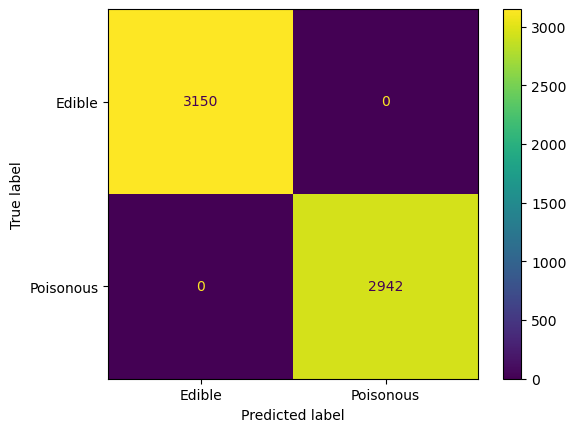

In [289]:
pipe.fit(X_train, y_train)
confusion = ConfusionMatrixDisplay.from_estimator(
    pipe, X_train, y_train, display_labels = ["Edible", "Poisonous"]
)

In [292]:
param_grid = {
    "kneighborsclassifier__n_neighbors": range(2, 20, 1),
}
grid_search = GridSearchCV(
    pipe, param_grid, cv = 5, scoring=scoring, refit="recall"
)
grid_search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder-1',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['cap_shape',
                                                                          'cap_surface',
                                                                          'odour',
                                                                          'gill_colour',
                                                                          'stalk_root',
                                                                          'stalk_surface_above_ring',
                                                                          'stalk_surface_below_ring',
                                                                          'stalk_colour_above_ring',
                                                                          'stalk_colour_below_ring',
                                                                          'veil_c...
                                                                        ('onehotencoder-2',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       dtype=<class 'int'>),
                                                                         ['bruises',
                                                                          'gill_attachment',
                                                                          'gill_spacing',
                                                                          'gill_size',
                                                                          'stalk_shape']),
                                                                        ('drop',
                                                                         'drop',
                                                                         ['veil_type',
                                                                          'cap_colour',
                                                                          'habitat'])])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': range(2, 20)},
             refit='recall', scoring=['accuracy', 'recall'])

In [293]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder-1',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['cap_shape',
                                                                          'cap_surface',
                                                                          'odour',
                                                                          'gill_colour',
                                                                          'stalk_root',
                                                                          'stalk_surface_above_ring',
                                                                          'stalk_surface_below_ring',
                                                                          'stalk_colour_above_ring',
                                                                          'stalk_colour_below_ring',
                                                                          'veil_c...
                                                                        ('onehotencoder-2',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       dtype=<class 'int'>),
                                                                         ['bruises',
                                                                          'gill_attachment',
                                                                          'gill_spacing',
                                                                          'gill_size',
                                                                          'stalk_shape']),
                                                                        ('drop',
                                                                         'drop',
                                                                         ['veil_type',
                                                                          'cap_colour',
                                                                          'habitat'])])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': range(2, 20)},
             refit='recall', scoring=['accuracy', 'recall'])

In [294]:
grid_results = pd.DataFrame(grid_search.cv_results_)
grid_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.020978      0.006464         0.030245        0.003060   
1        0.016859      0.000427         0.027590        0.002079   
2        0.017087      0.001131         0.026145        0.001408   
3        0.016550      0.000485         0.026488        0.000806   
4        0.020974      0.004637         0.041080        0.017023   
5        0.016845      0.000482         0.027029        0.000884   
6        0.016592      0.000478         0.028387        0.000954   
7        0.017066      0.001305         0.029138        0.001141   
8        0.017787      0.001381         0.034445        0.010892   
9        0.020274      0.002818         0.035264        0.002353   
10       0.018566      0.000971         0.031175        0.001594   
11       0.017765      0.000329         0.030183        0.000425   
12       0.018188      0.000908         0.041242        0.020169   
13       0.020536      0.003435         0.032353        0.001469   
14       0.017547      0.000558         0.032132        0.001295   
15       0.019053      0.001731         0.039740        0.016152   
16       0.017233      0.000198         0.030795        0.000473   
17       0.017624      0.000249         0.032248        0.000668   

   param_kneighborsclassifier__n_neighbors  \
0                                        2   
1                                        3   
2                                        4   
3                                        5   
4                                        6   
5                                        7   
6                                        8   
7                                        9   
8                                       10   
9                                       11   
10                                      12   
11                                      13   
12                                      14   
13                                      15   
14                                      16   
15                                      17   
16                                      18   
17                                      19   

                                       params  split0_test_accuracy  \
0    {'kneighborsclassifier__n_neighbors': 2}               1.00000   
1    {'kneighborsclassifier__n_neighbors': 3}               1.00000   
2    {'kneighborsclassifier__n_neighbors': 4}               1.00000   
3    {'kneighborsclassifier__n_neighbors': 5}               1.00000   
4    {'kneighborsclassifier__n_neighbors': 6}               0.99918   
5    {'kneighborsclassifier__n_neighbors': 7}               0.99918   
6    {'kneighborsclassifier__n_neighbors': 8}               0.99918   
7    {'kneighborsclassifier__n_neighbors': 9}               0.99918   
8   {'kneighborsclassifier__n_neighbors': 10}               0.99918   
9   {'kneighborsclassifier__n_neighbors': 11}               0.99918   
10  {'kneighborsclassifier__n_neighbors': 12}               0.99918   
11  {'kneighborsclassifier__n_neighbors': 13}               0.99918   
12  {'kneighborsclassifier__n_neighbors': 14}               0.99918   
13  {'kneighborsclassifier__n_neighbors': 15}               0.99918   
14  {'kneighborsclassifier__n_neighbors': 16}               0.99918   
15  {'kneighborsclassifier__n_neighbors': 17}               0.99918   
16  {'kneighborsclassifier__n_neighbors': 18}               0.99918   
17  {'kneighborsclassifier__n_neighbors': 19}               0.99918   

    split1_test_accuracy  split2_test_accuracy  split3_test_accuracy  ...  \
0                    1.0              1.000000                   1.0  ...   
1                    1.0              1.000000                   1.0  ...   
2                    1.0              1.000000                   1.0  ...   
3                    1.0              1.000000                   1.0  ...   
4                    1.0              0.999179                   1.0  ...   
5                    1.0

In [297]:
accuracy_versus_k_grid = (
    alt.Chart(grid_results, title="Grid Search")
    .mark_line(point=True)
    .encode(
        x=alt.X(
            'param_kneighborsclassifier__n_neighbors',
            title="Neighbors",
            scale=alt.Scale(zero=False),
        ),
        y=alt.Y(
            'mean_test_accuracy', 
            title="Mean Test Accuracy", 
            scale=alt.Scale(zero=False)
        ),
    )
    .configure_axis(labelFontSize=10, titleFontSize=15)
    .properties(width=400, height=300)
)
recall_versus_k_grid = (
    alt.Chart(grid_results, title="Grid Search")
    .mark_line(point=True)
    .encode(
        x=alt.X(
            'param_kneighborsclassifier__n_neighbors',
            title="Neighbors",
            scale=alt.Scale(zero=False),
        ),
        y=alt.Y(
            'mean_test_recall', 
            title="Mean Test Recall", 
            scale=alt.Scale(zero=False)
        ),
    )
    .configure_axis(labelFontSize=10, titleFontSize=15)
    .properties(width=400, height=300)
)

In [298]:
accuracy_versus_k_grid

alt.Chart(...)

In [299]:
recall_versus_k_grid

alt.Chart(...)

In [300]:
best_knn = grid_search.best_estimator_
best_knn

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder-1',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['cap_shape', 'cap_surface',
                                                   'odour', 'gill_colour',
                                                   'stalk_root',
                                                   'stalk_surface_above_ring',
                                                   'stalk_surface_below_ring',
                                                   'stalk_colour_above_ring',
                                                   'stalk_colour_below_ring',
                                                   'veil_colour', 'ring_type',
                                                   'spore_pr...
                                                   'population']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['n',
                                                                              'o',
                                                                              't']]),
                                                  ['ring_number']),
                                                 ('onehotencoder-2',
                                                  OneHotEncoder(drop='if_binary',
                                                                dtype=<class 'int'>),
                                                  ['bruises', 'gill_attachment',
                                                   'gill_spacing', 'gill_size',
                                                   'stalk_shape']),
                                                 ('drop', 'drop',
                                                  ['veil_type', 'cap_colour',
                                                   'habitat'])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=2))])

SCORE OUR MODEL!!

In [301]:
best_knn.score(X_test, y_test)

1.0

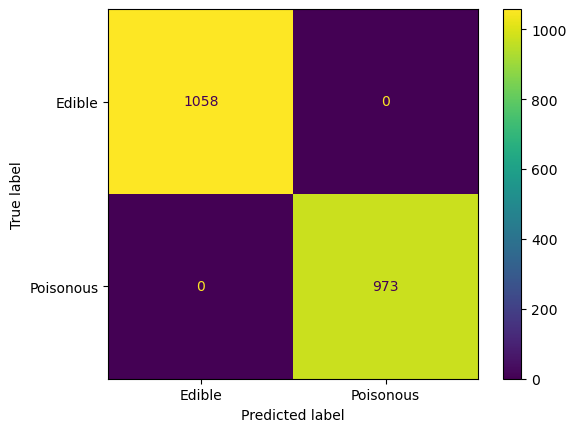

In [302]:
test_confusion = ConfusionMatrixDisplay.from_estimator(
    best_knn, X_test, y_test, display_labels = ["Edible", "Poisonous"]
)